##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

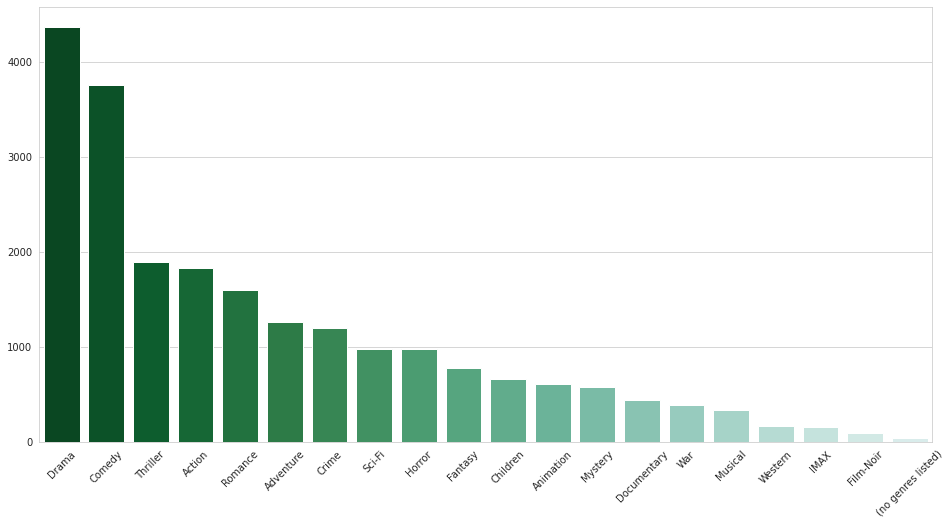

In [0]:
sns.set_style("whitegrid")

filmes_por_genero = filmes["generos"].str.get_dummies('|').sum().sort_values(ascending=False)
plt.figure(figsize=(16,8))
grafico = sns.barplot(x=filmes_por_genero.index,
            y=filmes_por_genero.values,
            palette=sns.color_palette("BuGn_r", n_colors=len(filmes_por_genero) + 4))
grafico
plt.setp(grafico.get_xticklabels(), rotation=45)
plt.show()

## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

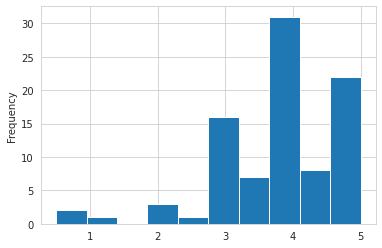

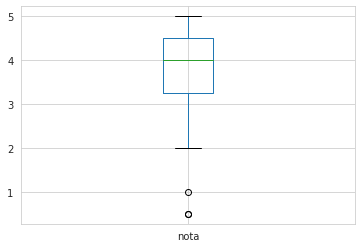

count    91.000000
mean      3.879121
std       0.989783
min       0.500000
25%       3.250000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64


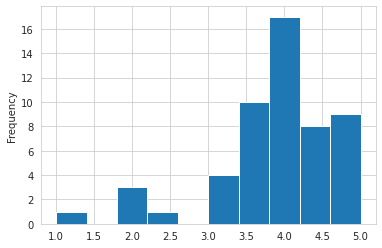

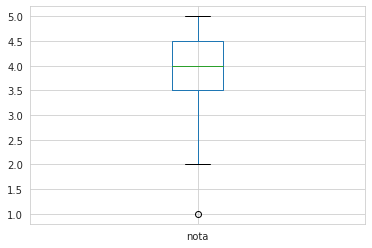

count    53.000000
mean      3.877358
std       0.876541
min       1.000000
25%       3.500000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64


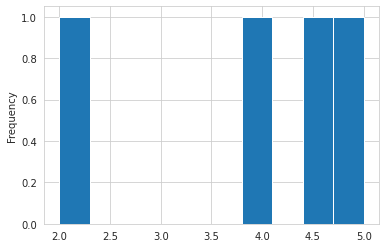

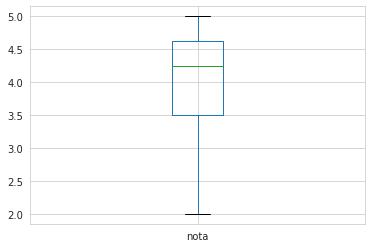

count    4.000000
mean     3.875000
std      1.314978
min      2.000000
25%      3.500000
50%      4.250000
75%      4.625000
max      5.000000
Name: nota, dtype: float64


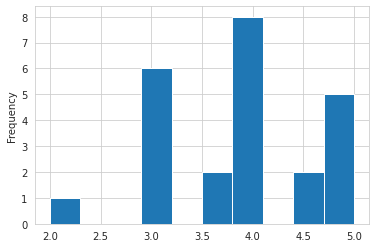

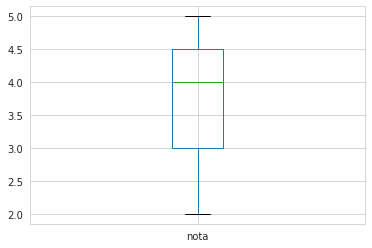

count    24.000000
mean      3.875000
std       0.824226
min       2.000000
25%       3.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: nota, dtype: float64


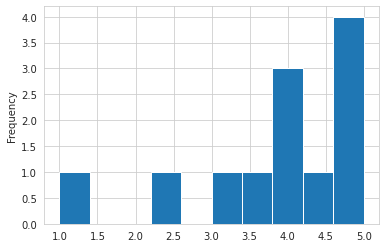

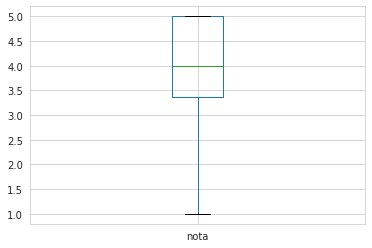

count    12.000000
mean      3.875000
std       1.227062
min       1.000000
25%       3.375000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64


In [0]:
ids_filmes_media_nota_5 = filmes_com_media.sort_values('nota', ascending = False)[2500:2505]['filmeId']
ids_filmes_media_nota_5
for valor in ids_filmes_media_nota_5:
  plot_filme(valor)

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

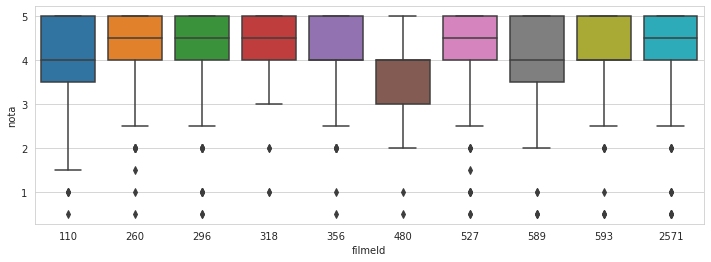

In [0]:
numero_de_avaliacoes = avaliacoes.groupby('filmeId')['usuarioId'].count()
filmes_com_numero_avaliacao = filmes_com_media.join(numero_de_avaliacoes, on="filmeId")
ids_dez_mais_votados = filmes_com_numero_avaliacao.sort_values('usuarioId', ascending = False).head(10)['filmeId']
ids_dez_mais_votados
filmes_com_numero_avaliacao.sort_values('usuarioId', ascending = False).head(10)
plt.figure(figsize=(12,4))
sns.boxplot(data = avaliacoes.query(f"filmeId in {list(ids_dez_mais_votados)}"), x ="filmeId", y="nota")
plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

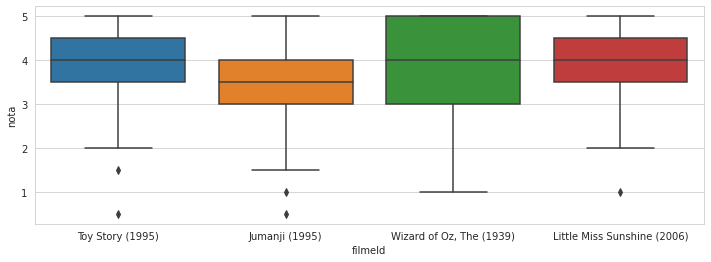

In [0]:
label_x = filmes.query("filmeId in [1,2,919,46578]")['titulo']
plt.figure(figsize=(12,4))
grafico_final = sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")
grafico_final
grafico_final.set_xticklabels(label_x)
plt.show()

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [0]:
# .loc permite selecionar e alterar uma determinada linha, ver sua documentação.

filmes_com_media['ano'] = ''
n = 0
while n < len(filmes_com_media):
  for pos in filmes_com_media.iloc[n,1]:
    try:
      int(pos)
      filmes_com_media.loc[[n], 'ano'] = filmes_com_media.loc[[n], 'ano'] + pos
    except:
      continue
  n = n + 1

In [0]:
filmes_com_media['ano_cor'] = ''
k = 0
while k < len(filmes_com_media): 
  filmes_com_media.loc[[k],'ano_cor'] = filmes_com_media['ano'][k][-4:]
  k = k + 1
filmes_com_media

,filmeId,titulo,generos,nota,ano,ano_cor
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,1995,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,1995,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,1995,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,1995,1995
4,5,Father of the Bride Part II (1995),Comedy,3.071429,1995,1995
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,2017,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,2017,2017
9739,193585,Flint (2017),Drama,3.500000,2017,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.500000,2018,2018


In [0]:
import numpy as np

# Alterando o tipo de dado, de string para inteiro.
ano_int = pd.to_numeric(filmes_com_media['ano_cor'], errors='coerce', downcast = 'integer')
filmes_com_media_ano = filmes_com_media.join(ano_int, lsuffix= '__')
filmes_com_media_ano.sort_values('ano_cor')

# Excluindo colunas do dataframe.
filmes_com_media_ano.drop('ano', inplace=True, axis=1)
filmes_com_media_ano.drop('ano_cor__', inplace=True, axis=1)

filmes_com_media_ano.columns = ['filmeId', 'titulo', 'genero','nota', 'ano']
filmes_com_media_ano.sort_values('ano')
filmes_com_media_ano.loc[[9525],'ano'] = np.nan
filmes_com_media_ano.sort_values('ano')

,filmeId,titulo,genero,nota,ano
5868,32898,"Trip to the Moon, A (Voyage dans la lune, Le) ...",Action|Adventure|Fantasy|Sci-Fi,3.5,1902.0
6355,49389,The Great Train Robbery (1903),Crime|Western,2.5,1903.0
9020,140541,The Electric Hotel (1908),Animation|Comedy|Sci-Fi,4.0,1908.0
4743,7065,"Birth of a Nation, The (1915)",Drama|War,2.0,1915.0
8170,102747,"Rink, The (1916)",Comedy,3.5,1916.0
...,...,...,...,...,...
9448,167570,The OA,(no genres listed),4.0,NaN
9514,171495,Cosmos,(no genres listed),4.5,NaN
9515,171631,Maria Bamford: Old Baby,(no genres listed),1.0,NaN
9525,171891,Generation Iron 2,(no genres listed),3.5,NaN


In [0]:
avaliacoes.join(filmes_com_media_ano, 'filmeId', lsuffix= '__')
notas_medias_por_ano = avaliacoes.join(filmes_com_media_ano, 'filmeId', lsuffix= '__').groupby("ano")["nota__"].mean()
notas_medias_por_ano

ano
1915.0    3.250000
1916.0    3.408451
1919.0    2.166667
1920.0    2.884615
1922.0    3.862069
            ...   
2013.0    3.500000
2014.0    3.441830
2015.0    3.398833
2016.0    3.375000
2017.0    3.000000
Name: nota__, Length: 100, dtype: float64

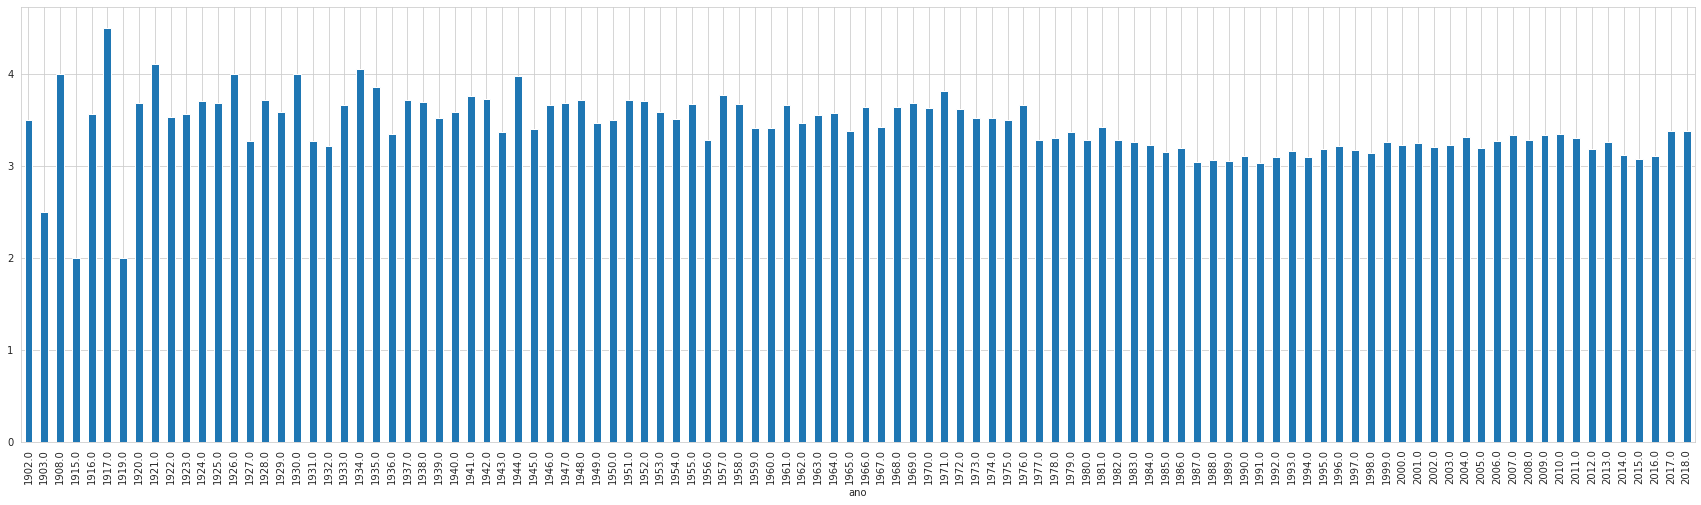

In [0]:
filmes_com_media_ano.sort_values('ano')
notas_medias_por_ano = filmes_com_media_ano.groupby("ano")["nota"].mean()
plt.figure(figsize= (30,8))
notas_medias_por_ano.plot(kind = 'bar', rot = 90, fontsize = 10, grid = True)
plt.show()